In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better plot display
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [4]:
df = pd.read_csv("vgsales.csv")  # Update the path if needed
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.info()
df.describe()
df.shape
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [8]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing 'Year' or 'Publisher' if few
df.dropna(subset=['Year', 'Publisher'], inplace=True)

# Convert Year to int
df['Year'] = df['Year'].astype(int)

# Remove duplicates
df.drop_duplicates(inplace=True)


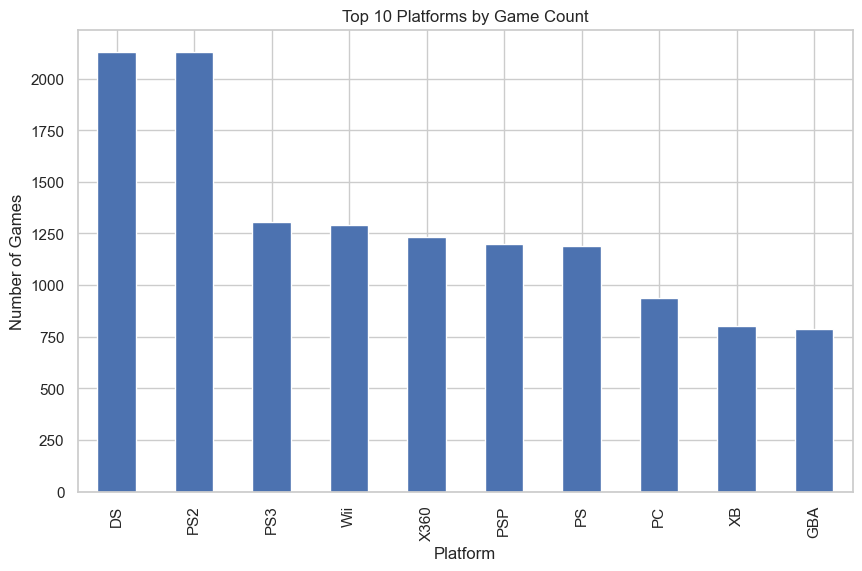

In [10]:
df['Platform'].value_counts().head(10).plot(kind='bar', title='Top 10 Platforms by Game Count')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.show()


### Top Platforms by Game Count

This bar chart shows the top 10 gaming platforms based on the number of games released. 

**Key Insight:** The **PlayStation 2 (PS2)** has the most games, followed by **Nintendo DS** and **Wii**, indicating their popularity and market dominance during their time.


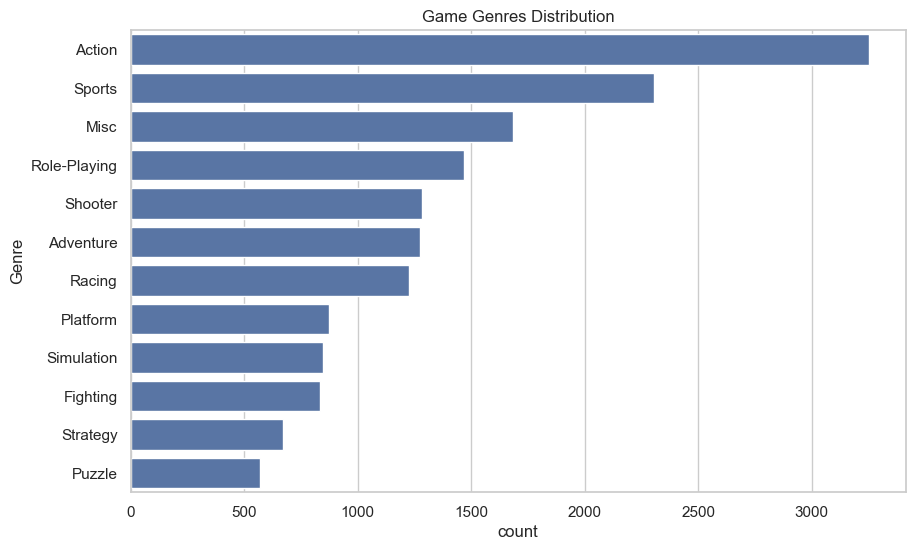

In [12]:
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title('Game Genres Distribution')
plt.show()


### Genre Distribution

This plot shows how many games belong to each genre.

**Key Insight:** **Action** games are the most common genre in the dataset, followed by **Sports** and **Adventure** games.


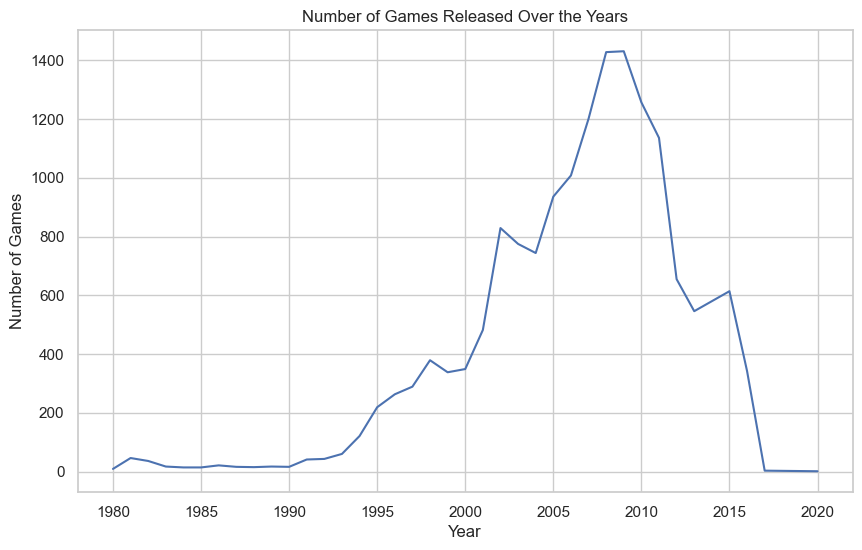

In [14]:
df['Year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Games Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()


### Game Releases Over the Years

This line plot shows the number of video games released each year.

**Key Insight:** Game releases increased significantly between **2002 and 2009**, with a peak around **2008**, showing rapid growth in the gaming industry during this time.


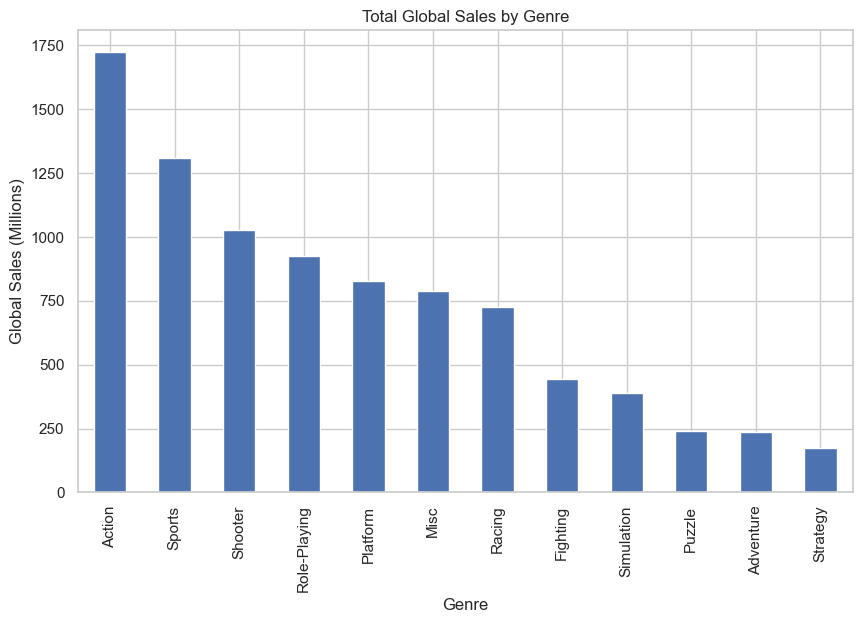

In [16]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', title='Total Global Sales by Genre')
plt.ylabel('Global Sales (Millions)')
plt.show()


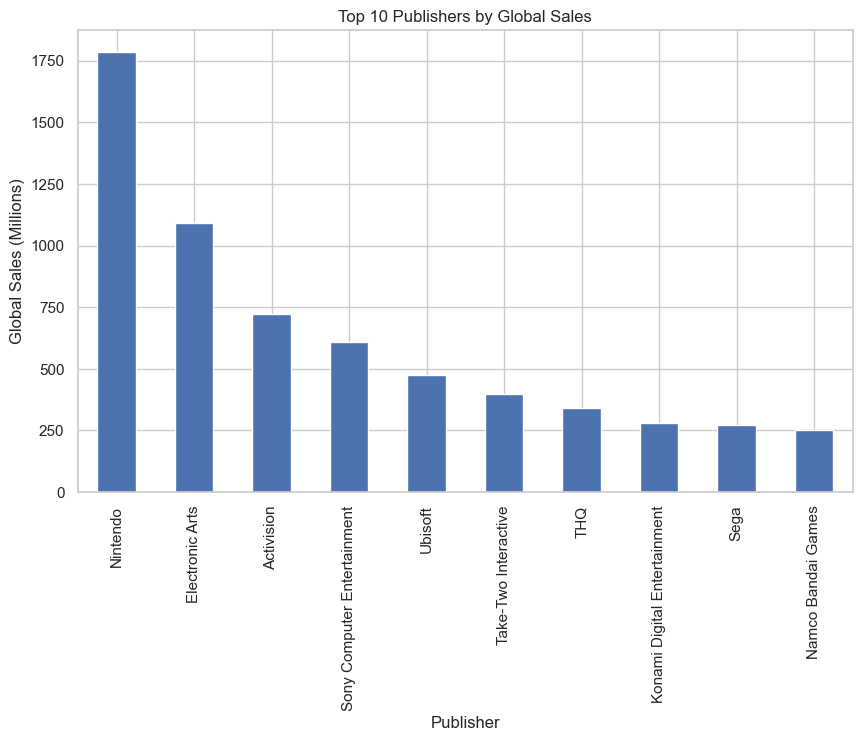

In [18]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_publishers.plot(kind='bar', title='Top 10 Publishers by Global Sales')
plt.ylabel('Global Sales (Millions)')
plt.show()


### Global Sales by Genre

This horizontal bar chart shows total global sales for each game genre.

**Key Insight:** **Action and Sports** games dominate global sales, suggesting strong worldwide demand for these genres.


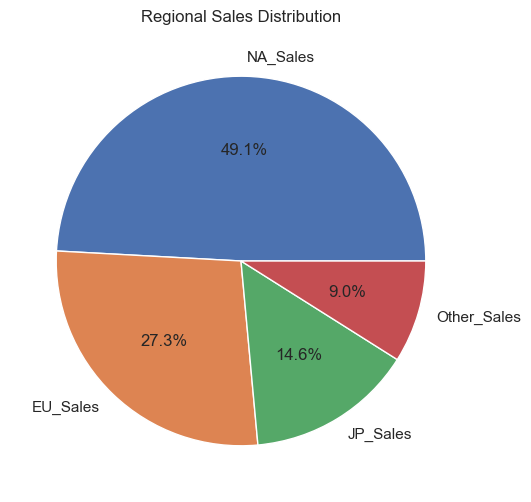

In [20]:
sales_by_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sales_by_region.plot(kind='pie', autopct='%1.1f%%', title='Regional Sales Distribution')
plt.ylabel('')
plt.show()


### Regional Sales Distribution

This pie chart shows how global sales are divided across regions: North America, Europe, Japan, and Others.

**Key Insight:** **North America** has the highest share of global video game sales, followed by Europe and Japan.


### 🏁 Conclusion

In this project, we analyzed the Video Game Sales dataset to understand patterns in the gaming industry. We found that platforms like PS2, DS, and Wii had the most game releases. Action and Sports emerged as the most popular and best-selling genres. The highest number of games were released between 2006 and 2009, showing a peak period for the industry. North America recorded the highest regional sales, and Nintendo stood out as the top-selling publisher. Overall, this analysis provides useful insights into platform trends, genre preferences, and regional sales performance.
